In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [70]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [71]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [72]:
# Read S2 dataset 
Data1 = pd.read_csv('data_raw/Indices/S2Data.csv')

# Remove none values
S2Data = Data1.dropna()

# Display the first few rows of our DataFrame
S2Data.head()
print(S2Data)

       Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0      2016      5    7  0.956879 -0.044137 -0.022070  0.117900  0.002955   
1      2016      5    7  0.956959 -0.043948 -0.022029  0.117907  0.002955   
2      2016      5    7  1.015101  0.016830  0.007469  0.147959  0.008728   
3      2016      5    7  0.991688 -0.008969 -0.004225  0.142645  0.007528   
4      2016      5    7  0.881265 -0.110070 -0.063161  0.116655  0.002038   
...     ...    ...  ...       ...       ...       ...       ...       ...   
35028  2020     10   30  0.854190 -0.129064 -0.078726  0.152807  0.001676   
35029  2020     10   30  1.077379  0.065607  0.035775  0.126659  0.001469   
35030  2020     10   30  0.946243 -0.050380 -0.027911  0.134852  0.007321   
35031  2020     10   30  0.962221 -0.039201 -0.019493  0.132445  0.007393   
35032  2020     10   30  0.960195 -0.038782 -0.020508  0.126638  0.006003   

            B11       B12  ...        B3        B4        B5        B6  \
0

In [73]:
# Read Field dataset 
Data2 = pd.read_csv('data_raw/Indices/FieldData.csv')

# Remove none values
FieldData = Data2.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(FieldData)

             Lake Name          Y          X       Date  Year  Month  Day  \
0     Little Long Pond  40.977600 -72.296204   6/4/2016  2016      6    4   
1       Cossayuna Lake  43.200600 -73.423401   6/3/2016  2016      6    3   
2           Hatch Lake  42.834598 -75.677803   6/5/2016  2016      6    5   
3      Montgomery Lake  41.525299 -74.917297   6/4/2016  2016      6    4   
4        Lake Devenoge  41.521000 -74.839401   6/4/2016  2016      6    4   
...                ...        ...        ...        ...   ...    ...  ...   
6070         Long Pond  40.975102 -72.290802  7/26/2020  2020      7   26   
6071         Long Pond  40.975102 -72.290802   8/9/2020  2020      8    9   
6072         Long Pond  40.975102 -72.290802  8/23/2020  2020      8   23   
6073         Long Pond  40.975102 -72.290802   9/7/2020  2020      9    7   
6074         Long Pond  40.975102 -72.290802  9/20/2020  2020      9   20   

       Chl-a  
0      1.200  
1      0.600  
2      2.900  
3      2.900  


In [74]:
# Using merge function by setting how='inner'
MergedData = pd.merge(S2Data, FieldData, on=['Y', 'X', 'Year', 'Month', 'Day'], how='inner')
MergedData.to_csv('data_output/Log2bdaModel/MergedData.csv')
  
# displaying result
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B6        B7        B8       B8A  \
0     0.012669

In [75]:
# Return the natural logarithm of Chl-a (Y)
MergedData['LnChl-a']=np.log(MergedData['Chl-a'])
print(MergedData)

      Year  Month  Day      2BDA      3BDA      NDCI        B1       B10  \
0     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
1     2016      6    7  0.951738 -0.048882 -0.024856  0.119966  0.000776   
2     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
3     2016      6    7  0.954945 -0.070901 -0.023265  0.111821  0.001138   
4     2016      6   10  0.975644 -0.026771 -0.012388  0.116193  0.001103   
...    ...    ...  ...       ...       ...       ...       ...       ...   
1482  2020      9   24  1.006182  0.007508  0.003046  0.136534  0.007655   
1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810  0.001697   
1484  2020      9   27  0.948135 -0.054520 -0.026673  0.270976  0.003162   
1485  2020      9   30  0.906324 -0.089171 -0.049167  0.135859  0.001359   
1486  2020      9   30  1.060907  0.070528  0.027154  0.190724  0.001834   

           B11       B12  ...        B7        B8       B8A        B9  \
0     0.012669

In [76]:
# Descriptive statistics of all variables
list = ['2BDA', 'LnChl-a']

# get the summary
desc_mergeddata = MergedData [list].describe()

# add the standard deviation metric
desc_mergeddata.loc['+3_std'] = desc_mergeddata.loc['mean'] + (desc_mergeddata.loc['std'] * 3)
desc_mergeddata.loc['-3_std'] = desc_mergeddata.loc['mean'] - (desc_mergeddata.loc['std'] * 3)

# display it
desc_mergeddata

,2BDA,LnChl-a
count,1487.000000,1487.000000
mean,0.995474,1.502210
std,0.132150,1.279814
min,0.406412,-2.995732
25%,0.916918,0.641854
50%,0.966684,1.360977
75%,1.048701,2.301784
max,2.165665,5.113793
+3_std,1.391925,5.341652
-3_std,0.599024,-2.337232


In [77]:
# Pearson Coefficient 
corr = MergedData[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,LnChl-a
2BDA,1.000000,0.260471
LnChl-a,0.260471,1.000000


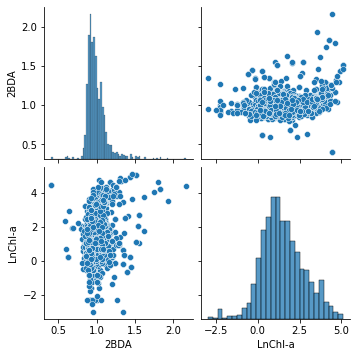

In [78]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData[list])

In [79]:
X_columns = ["2BDA"]

# Extract independent variables (X) & dependent variable (Y)
X = MergedData[X_columns]
Y = MergedData['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.605
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              1590.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                   1.05e-211
Time:                        12:52:29   Log-Likelihood:                         -1707.6
No. Observations:                1040   AIC:                                      3417.
Df Residuals:                    1039   BIC:                                      3422.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 91      1.365006
1102    1.253376
1237    1.426037
683     1.525390
561     1.469511
          ...   
154     1.844800
639     1.696643
768     1.472618
821     1.378345
1006    2.054440
Length: 447, dtype: float64


In [81]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 11.9
MAE 3.15
RMSE 3.45


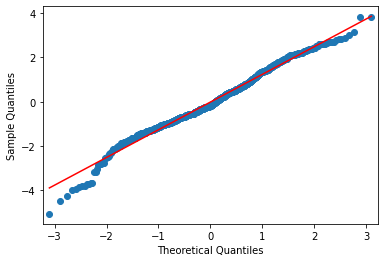

The mean of the residuals is -0.01385


In [82]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [83]:
# MergedData: Threshold  Chl-a < 2
MergedData1 = MergedData.loc[(MergedData["LnChl-a"] > 0.30103)]
MergedData1.shape

(1270, 25)

In [84]:
# get the summary
desc_mergeddata1 = MergedData1 [list].describe()

# add the standard deviation metric
desc_mergeddata1.loc['+3_std'] = desc_mergeddata1.loc['mean'] + (desc_mergeddata1.loc['std'] * 3)
desc_mergeddata1.loc['-3_std'] = desc_mergeddata1.loc['mean'] - (desc_mergeddata1.loc['std'] * 3)

# display it
desc_mergeddata1

,2BDA,LnChl-a
count,1270.000000,1270.000000
mean,0.998089,1.816260
std,0.132449,1.073750
min,0.406412,0.302472
25%,0.917081,0.946238
50%,0.971714,1.606031
75%,1.054672,2.483189
max,2.165665,5.113793
+3_std,1.395436,5.037510
-3_std,0.600742,-1.404990


In [85]:
# Pearson Coefficient 
corr1 = MergedData1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,LnChl-a
2BDA,1.000000,0.332306
LnChl-a,0.332306,1.000000


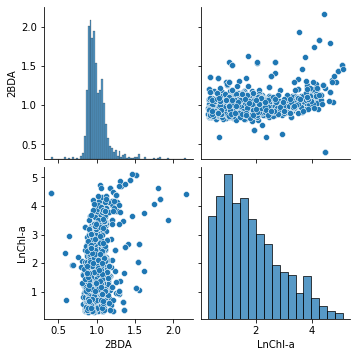

In [86]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData1[list])

In [87]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData1[X_columns]
Y = MergedData1['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              2896.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                   8.94e-282
Time:                        12:53:09   Log-Likelihood:                         -1288.2
No. Observations:                 889   AIC:                                      2578.
Df Residuals:                     888   BIC:                                      2583.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 1178    1.780049
257     1.782973
712     1.789557
469     1.871883
1234    2.069158
          ...   
346     2.110333
773     1.639467
433     1.648193
946     1.734565
1297    1.674739
Length: 381, dtype: float64


In [89]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 29.6
MAE 4.87
RMSE 5.44


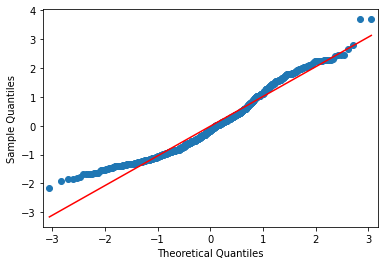

The mean of the residuals is -0.01289


In [90]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [91]:
# MergedData: Threshold  Chl-a > 8
MergedData2 = MergedData.loc[(MergedData["LnChl-a"] > 0.9031)]
MergedData2.shape

(985, 25)

In [92]:
# get the summary
desc_mergeddata2 = MergedData2 [list].describe()

# add the standard deviation metric
desc_mergeddata2.loc['+3_std'] = desc_mergeddata2.loc['mean'] + (desc_mergeddata2.loc['std'] * 3)
desc_mergeddata2.loc['-3_std'] = desc_mergeddata2.loc['mean'] - (desc_mergeddata2.loc['std'] * 3)

# display it
desc_mergeddata2

,2BDA,LnChl-a
count,985.000000,985.000000
mean,1.007633,2.165318
std,0.140114,0.966410
min,0.406412,0.904218
25%,0.922727,1.373716
50%,0.980122,1.931521
75%,1.062574,2.788462
max,2.165665,5.113793
+3_std,1.427975,5.064548
-3_std,0.587291,-0.733912


In [93]:
# Pearson Coefficient 
corr2 = MergedData2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,LnChl-a
2BDA,1.000000,0.341087
LnChl-a,0.341087,1.000000


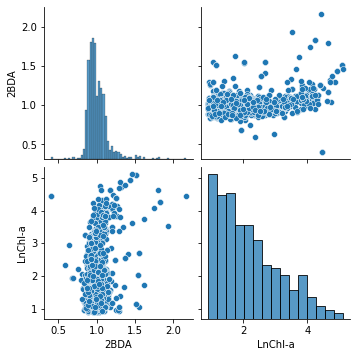

In [94]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(MergedData2[list])

In [100]:
# Extract independent variables (X) & dependent variable (Y)
X = MergedData2[X_columns]
Y = MergedData2['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                LnChl-a   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              4125.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):                   7.78e-293
Time:                        12:54:41   Log-Likelihood:                         -890.61
No. Observations:                 689   AIC:                                      1783.
Df Residuals:                     688   BIC:                                      1788.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [101]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 1446    2.101031
404     2.055947
750     1.921902
1236    2.017295
1108    2.103930
          ...   
688     2.205576
651     1.772822
121     3.925631
634     2.272326
1179    2.043168
Length: 296, dtype: float64


In [102]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.16e+02
MAE 7.88
RMSE 10.8


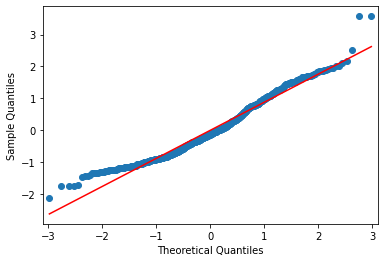

The mean of the residuals is -0.001897


In [103]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))